# Score prediction


In [1]:
import tensorflow as tf
import tensorflow.contrib.eager as tfe
import numpy as np
import matplotlib.pyplot as plt

tf.enable_eager_execution()
tf.__version__

'1.14.0'

## Setting Data

In [2]:
xy = np.loadtxt('./data-01-test-score.csv', delimiter=',', dtype=np.float32)

x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]

print(x_train.shape, y_train.shape)


(25, 3) (25, 1)


## make a dataset

In [3]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))


In [4]:
W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

print(W,b)


<tf.Variable 'weight:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.49808457],
       [ 0.46072277],
       [-1.099633  ]], dtype=float32)> <tf.Variable 'bias:0' shape=(1,) dtype=float32, numpy=array([0.17739113], dtype=float32)>


In [5]:
def linear_regression(features):
    hypothesis  = tf.matmul(features, W) + b
    return hypothesis
  
print(linear_regression(x_train))

tf.Tensor(
[[ -9.077087 ]
 [-15.223007 ]
 [-12.534271 ]
 [-16.818954 ]
 [-10.029045 ]
 [-12.710693 ]
 [-16.033028 ]
 [-16.590141 ]
 [-19.05912  ]
 [-24.991035 ]
 [-13.477386 ]
 [-16.382553 ]
 [ -9.798683 ]
 [ -3.8893127]
 [-17.095291 ]
 [-18.061188 ]
 [ -1.1928481]
 [-20.278572 ]
 [ -8.173103 ]
 [ -7.403755 ]
 [-18.324486 ]
 [-17.075401 ]
 [-16.20082  ]
 [ -1.8021315]
 [-13.624405 ]], shape=(25, 1), dtype=float32)


In [6]:
def loss_fn(hypothesis, labels):
    cost = tf.reduce_mean(tf.square(hypothesis - labels))
    return cost

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.00001)

In [7]:
epochs = 5000

for step in range(epochs):
  for features, labels in dataset:
    with tf.GradientTape() as tape:
      loss_value = loss_fn(linear_regression(features),labels)
      grads = tape.gradient(loss_value, [W,b])
      optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
      if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(linear_regression(features),labels)))

Iter: 0, Loss: 11671.4102
Iter: 100, Loss: 66.6768
Iter: 200, Loss: 61.9355
Iter: 300, Loss: 57.5777
Iter: 400, Loss: 53.5716
Iter: 500, Loss: 49.8883
Iter: 600, Loss: 46.5012
Iter: 700, Loss: 43.3859
Iter: 800, Loss: 40.5201
Iter: 900, Loss: 37.8833
Iter: 1000, Loss: 35.4568
Iter: 1100, Loss: 33.2233
Iter: 1200, Loss: 31.1671
Iter: 1300, Loss: 29.2738
Iter: 1400, Loss: 27.5300
Iter: 1500, Loss: 25.9236
Iter: 1600, Loss: 24.4434
Iter: 1700, Loss: 23.0793
Iter: 1800, Loss: 21.8218
Iter: 1900, Loss: 20.6622
Iter: 2000, Loss: 19.5928
Iter: 2100, Loss: 18.6063
Iter: 2200, Loss: 17.6959
Iter: 2300, Loss: 16.8557
Iter: 2400, Loss: 16.0799
Iter: 2500, Loss: 15.3635
Iter: 2600, Loss: 14.7017
Iter: 2700, Loss: 14.0902
Iter: 2800, Loss: 13.5250
Iter: 2900, Loss: 13.0024
Iter: 3000, Loss: 12.5191
Iter: 3100, Loss: 12.0720
Iter: 3200, Loss: 11.6582
Iter: 3300, Loss: 11.2752
Iter: 3400, Loss: 10.9205
Iter: 3500, Loss: 10.5920
Iter: 3600, Loss: 10.2875
Iter: 3700, Loss: 10.0053
Iter: 3800, Loss: 9.7

In [8]:
print(W, b)

<tf.Variable 'weight:0' shape=(3, 1) dtype=float32, numpy=
array([[0.59216386],
       [0.52536875],
       [0.900156  ]], dtype=float32)> <tf.Variable 'bias:0' shape=(1,) dtype=float32, numpy=array([0.187452], dtype=float32)>


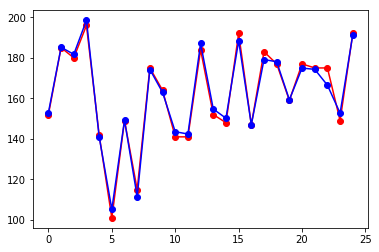

In [9]:
hypothesis= linear_regression(x_train)

plt.plot(y_train, 'o-', color='red')
plt.plot(hypothesis.numpy(), 'o-', color='blue')
plt.show()